In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Generate binary message as random array of length N
N = 100000
m = np.random.randint(2,size=N)
print(sum(m))

#BPSK mostulation
x = np.ones(len(m),dtype=int)
for i in range(len(m)):
    if m[i] < 1:
        x[i] = -1

#Simulate AWGN channel
mu, sigma = 0, 1
z = np.random.normal(mu,sigma)
y = z+x

#HD decoder
m_h = np.zeros(len(y))
for i in range(len(y)):
    if y[i] < 0:
        m_h[i] = 0
    else:
        m_h[i] = 1

err = 1.0*(m != m_h).sum()/N


50181


In [29]:
#Generate Eb/No in dB and set constants
db_max = 11
db_min = -5
p = 1   #For uncoded BPSK the power and rate are both 1
R = 1
N = 5000000
EbNo_range = range(db_min,db_max)
BER = [None]*(db_max+abs(db_min))
err_goal = 10**(-5)*np.ones((db_max+abs(db_min)))
for i in range(db_min, db_max):

    EbNodB = EbNo_range[i]
    EbNo = 10.0**(EbNodB/10.0)
    x = 2*(np.random.rand(N) >= 0.5) -1
    noise_stdev = np.sqrt(p/(2*R*EbNo))
    y = x + noise_stdev*np.random.randn(N)
    y_d = 2*(y >= 0) - 1    #decoding y
    err = (x != y_d).sum()
    BER[i] = 1.0*err/N

ep = np.logspace(-6,-1)
Hb = 1+ep*np.log2(ep)+(1-ep)*np.log2(1-ep)
EbN0R0dB = 10*np.log10((Hb)*np.log(2))
EbN0R05dB=10*np.log10(2**(Hb)-1)
EbN0R25dB=10*np.log10((2 ** (Hb/2)-1)*2)
EbN0R34dB=10*np.log10((2 ** (Hb*(3/2))-1)*(2/3))


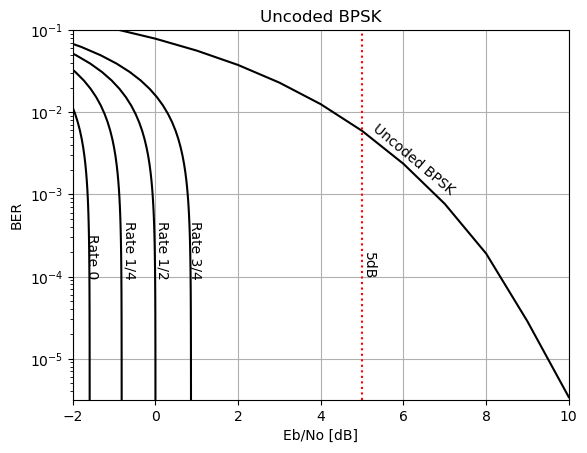

In [75]:
plt.figure()
plt.text(0,10 ** (-4),'Rate 1/2',rotation=-90)
plt.text(-0.8,10 ** (-4),'Rate 1/4',rotation=-90)
plt.text(-1.7,10 ** (-4),'Rate 0',rotation=-90)
plt.text(0.8,10 ** (-4),'Rate 3/4',rotation=-90)
plt.text(5,10 ** (-4),'5dB',rotation=-90)
plt.text(5.2,10 ** (-3),'Uncoded BPSK',rotation=-40)
plt.semilogy(EbNo_range, BER,'-',label='Uncoded BPSK',color='black')
plt.semilogy(EbN0R0dB, ep,'-',label='Rate 0',color='black')
plt.semilogy(EbN0R05dB, ep,'-',label='Rate 1/2',color='black')
plt.semilogy(EbN0R25dB, ep,'-',label='Rate 1/4',color='black')
plt.semilogy(EbN0R34dB, ep,'-',label='Rate 3/4',color='black')

plt.axvline(x=5,color='red',linestyle=':', label='5dB')
plt.xlim([-2,10])
plt.ylim([10 ** (-5.5), 10 ** (-1)])
plt.xlabel('Eb/No [dB]')
plt.ylabel('BER')
plt.title('Uncoded BPSK')
plt.grid(True)
